### Loading files and packages

In [ ]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter as gauss

from pyspec import spectrum as spec
from matplotlib.colors import LogNorm

In [ ]:

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[-9:])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt)



In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
varf

<xarray.Dataset>
Dimensions:               (y: 390, x: 300, lev_M: 49, lev_W: 50, time_counter: 274, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
  * lev_M                 (lev_M) float32 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0
  * lev_W                 (lev_W) float32 1.0 2.0 3.0 4.0 ... 48.0 49.0 50.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-11-01T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/28)
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    T2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    Q2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINCV                (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINNCV               (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    ...                    ...
    XKHH                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    BN2                   (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    AKMS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    AKHS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    EXCH_H                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
    EXCH_M                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
Attributes: (12/100)
    name:                            Out/wrf_3D_Y2011M11_DAY
    description:                     wrf M grid variables
    title:                           wrf M grid variables
    Conventions:                     CF-1.6
    timeStamp:                       2020-Jul-28 14:17:36 GMT
    uuid:                            b6883739-62d0-4439-ae6e-92fc67aed774
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           24
    ISURBAN:                         1
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

##### Defining the dx and dy in meters (approximately)

In [21]:
# dxx=0.013*111e3
# dyy=0.013*111e3


dxx=0.013*111
dyy=0.013*111

## SST - Test

In [22]:
tf=varf.SST[:,30:-30,30:200] 
tt=vart.SST[:,30:-30,30:200]

exspec=spec.TWODimensional_spec(tf[0,:,:],dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)


Tf=np.zeros([tf.shape[0],exspec.ki.shape[0]])*np.nan;

Tt=np.zeros([tt.shape[0],exspec.ki.shape[0]])*np.nan;

for ixx in range(hf.shape[0]):
    tpf=spec.TWODimensional_spec(tf[ixx,:,:],dxx,dyy)
    tpt=spec.TWODimensional_spec(tt[ixx,:,:],dxx,dyy)

    Tf[ixx,:]=(tpf.ispec)
    Tt[ixx,:]=(tpt.ispec)




## Surface Heatflux

In [6]:
hf=varf.HFX[:,30:-30,30:200] 
ht=vart.HFX[:,30:-30,30:200]

exspec=spec.TWODimensional_spec(hf[0,:,:],dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)


Hf=np.zeros([hf.shape[0],exspec.ki.shape[0]])*np.nan;

Ht=np.zeros([ht.shape[0],exspec.ki.shape[0]])*np.nan;

for ixx in range(hf.shape[0]):
    hpf=spec.TWODimensional_spec(hf[ixx,:,:],dxx,dyy)
    hpt=spec.TWODimensional_spec(ht[ixx,:,:],dxx,dyy)

    Hf[ixx,:]=(hpf.ispec)
    Ht[ixx,:]=(hpt.ispec)



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


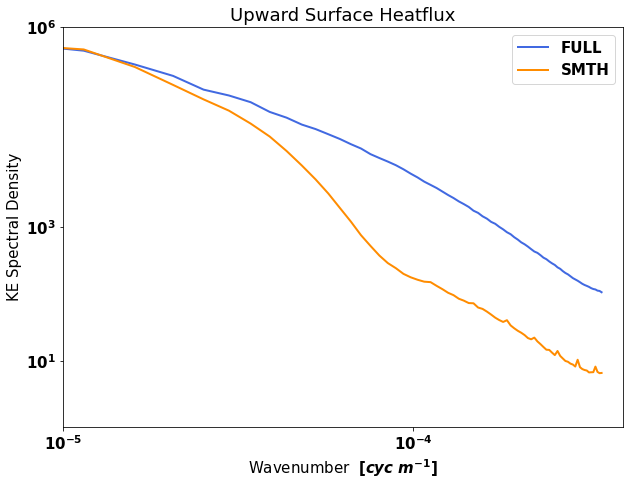

In [7]:


plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(Hf,axis=0)),label='FULL',linewidth=2,color='royalblue')


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(Ht,axis=0)),label='SMTH',linewidth=2,color='darkorange')

# plt.plot(np.log10(k2),np.log10(E2),'k--')




plt.legend()

# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3,6]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])


plt.title('Upward Surface Heatflux')
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')

plt.xlim(-5,-3.4)
plt.ylim(0,6)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Total_avg_KE.png')




In [9]:
import datetime

t_ind=pd.DatetimeIndex(hf.time_centered.compute())
mon_ind=pd.DatetimeIndex(hf.time_centered.compute()).month
mes=np.array([11,12,1,2,3,4,5,6,7])
mes_str=['Nov/11','Dec/11','Jan/12','Feb/12','Mar/12','Apr/12','May/12','Jun/12','Jul/12']

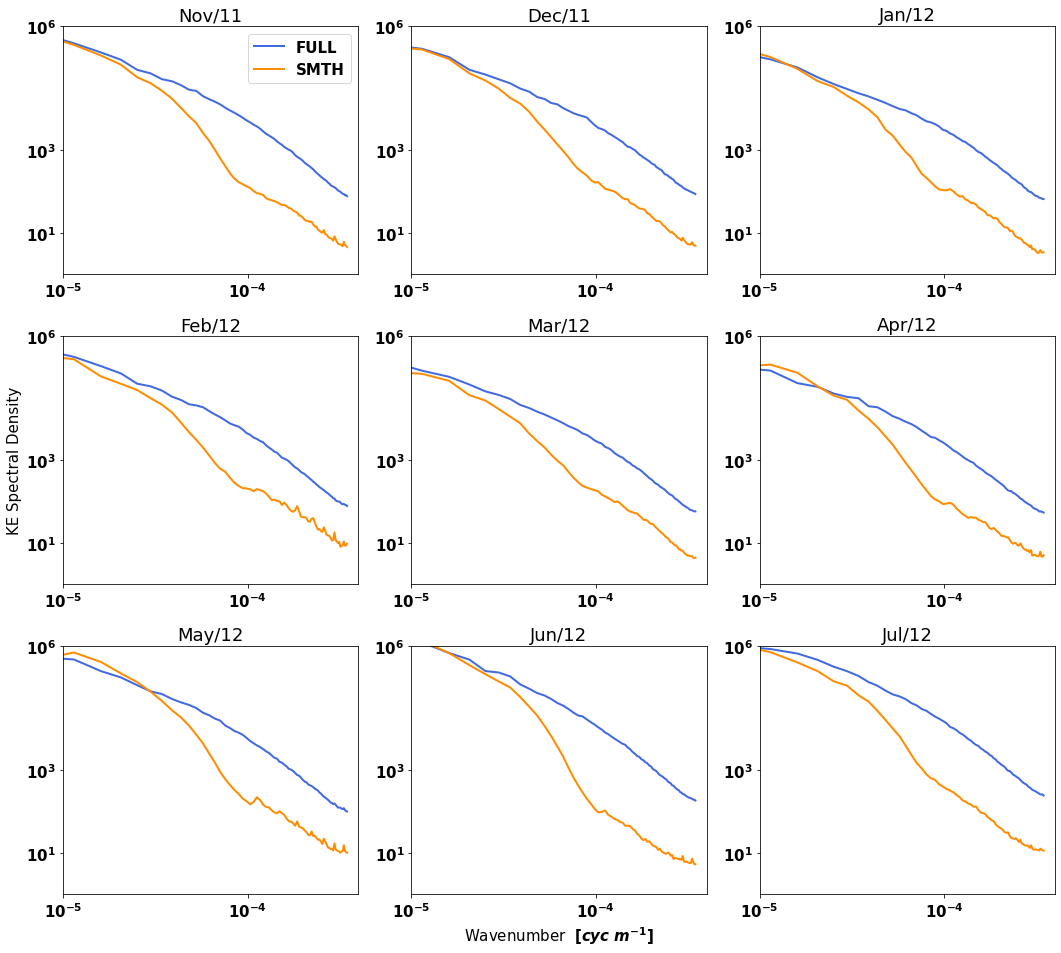

In [10]:
fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(Hf[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='royalblue')
    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(Ht[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='darkorange')
    # axs[ipp].grid()
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-3,-1,1,3,6]))
    axs[ipp].set_yticklabels([r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(0,6)
    
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_HF.png')





## KE Spectral Analysis (Whole Region)
#### Area of study cropped in attempt to exclude the effect of model's "sponge" and coastline

In [11]:
uf=varf.UOCE[:,30:-30,30:200] 
vf=varf.VOCE[:,30:-30,30:200]

ut=vart.UOCE[:,30:-30,30:200]
vt=vart.VOCE[:,30:-30,30:200]



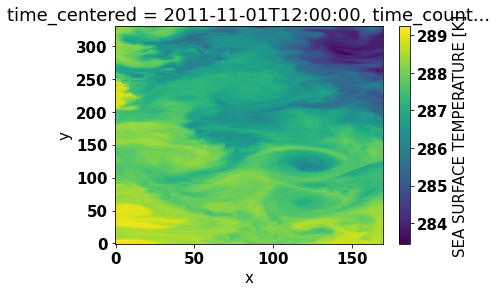

In [12]:
 varf.SST[0,30:-30,30:200].plot() #illustration

### Creating daily spectra array
##### Using an example to creating a simple array for all the daily spectra
##### The KE spectrum is computed by adding the U and V spectra then diving by 2

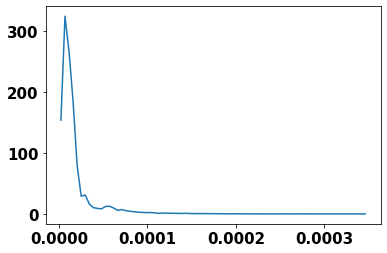

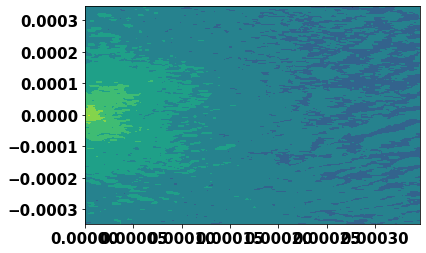

In [13]:
exspec=spec.TWODimensional_spec(uf[0,:,:].values,dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)

plt.figure()
plt.plot(exspec.ki,exspec.ispec)

plt.figure()
plt.contourf(exspec.kk1,exspec.kk2,np.log10(exspec.spec))

In [14]:
exspec=spec.TWODimensional_spec(uf[0,:,:],dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)

Ekef=np.zeros([uf.shape[0],exspec.ki.shape[0]])*np.nan;

Eket=np.zeros([ut.shape[0],exspec.ki.shape[0]])*np.nan;


ixx=10
for ixx in range(uf.shape[0]):
    uspf=spec.TWODimensional_spec(uf[ixx,:,:],dxx,dyy)
    vspf=spec.TWODimensional_spec(vf[ixx,:,:],dxx,dyy)
    uspt=spec.TWODimensional_spec(ut[ixx,:,:],dxx,dyy)
    vspt=spec.TWODimensional_spec(vt[ixx,:,:],dxx,dyy)


    Ekef[ixx,:]=(uspf.ispec+vspf.ispec)/2
    Eket[ixx,:]=(uspt.ispec+vspt.ispec)/2


### Total average - KE


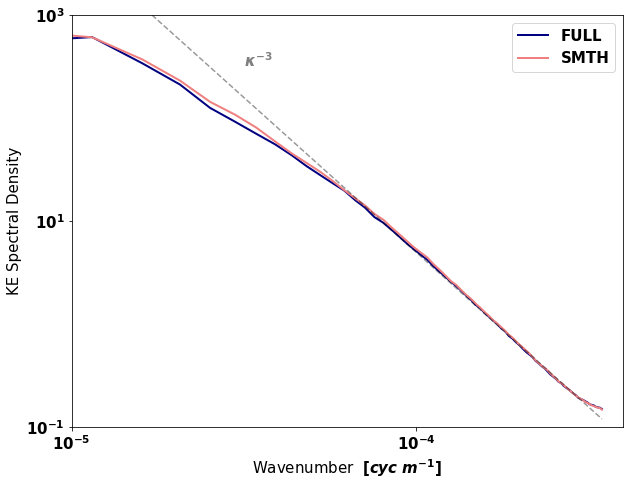

In [15]:
k2 = np.array([exspec.ki[0],exspec.ki[-1]])
E2 = 1/k2**2/(10**6.8)
k3 = np.array([exspec.ki[0],exspec.ki[-1]])
E3 = 1/k3**3/(10**11.3)



plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(Ekef,axis=0)),label='FULL',linewidth=2,color='navy')


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(Eket,axis=0)),label='SMTH',linewidth=2,color='lightcoral')

# plt.plot(np.log10(k2),np.log10(E2),'k--',label=r'$\kappa^{-2}$')
plt.plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
plt.text(-4.5,2.5,r'$\kappa^{-3}$',weight='normal',alpha=0.5)






plt.legend()

# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])


#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')
plt.xlim(-5,-3.4)
plt.ylim(-1,3)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Total_avg_KE.png')




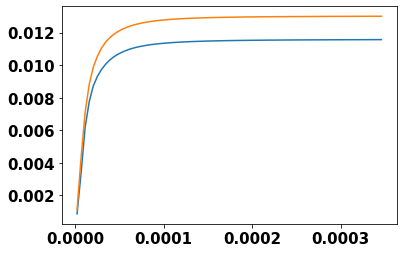

In [164]:
plt.plot(exspec.ki,np.cumsum(Kf)*np.diff(exspec.ki)[0])
plt.plot(exspec.ki,np.cumsum(Kt)*np.diff(exspec.ki)[0])

In [168]:


# Kf=np.nanmean(Ekef,axis=0)
# Kt=np.nanmean(Eket,axis=0)

# rr=np.cumsum(exspec.ki)*values

# # calculating frequency and class interval
# values, base = np.histogram(Kf,bins=exspec.ki.shape[0])
# values2, base2 = np.histogram(Kt,bins=exspec.ki.shape[0])


# calculating cumulative sum
# cumsum = np.cumsum(values)
# cumsum2 = np.cumsum(values2)


  
# plotting  the ogive graph
# plt.plot(base[1:], cumsum, color='red', marker='o', linestyle='-')
# plt.plot(base[1:], rr, color='red', marker='o', linestyle='-')


# plt.plot(np.log10(exspec.ki),base[1:], color='red', linestyle='-',linewidth=2)
# plt.plot(np.log10(exspec.ki),base2[1:], color='blue', linestyle='-',linewidth=2)



  

### Monthly Decomposition KE

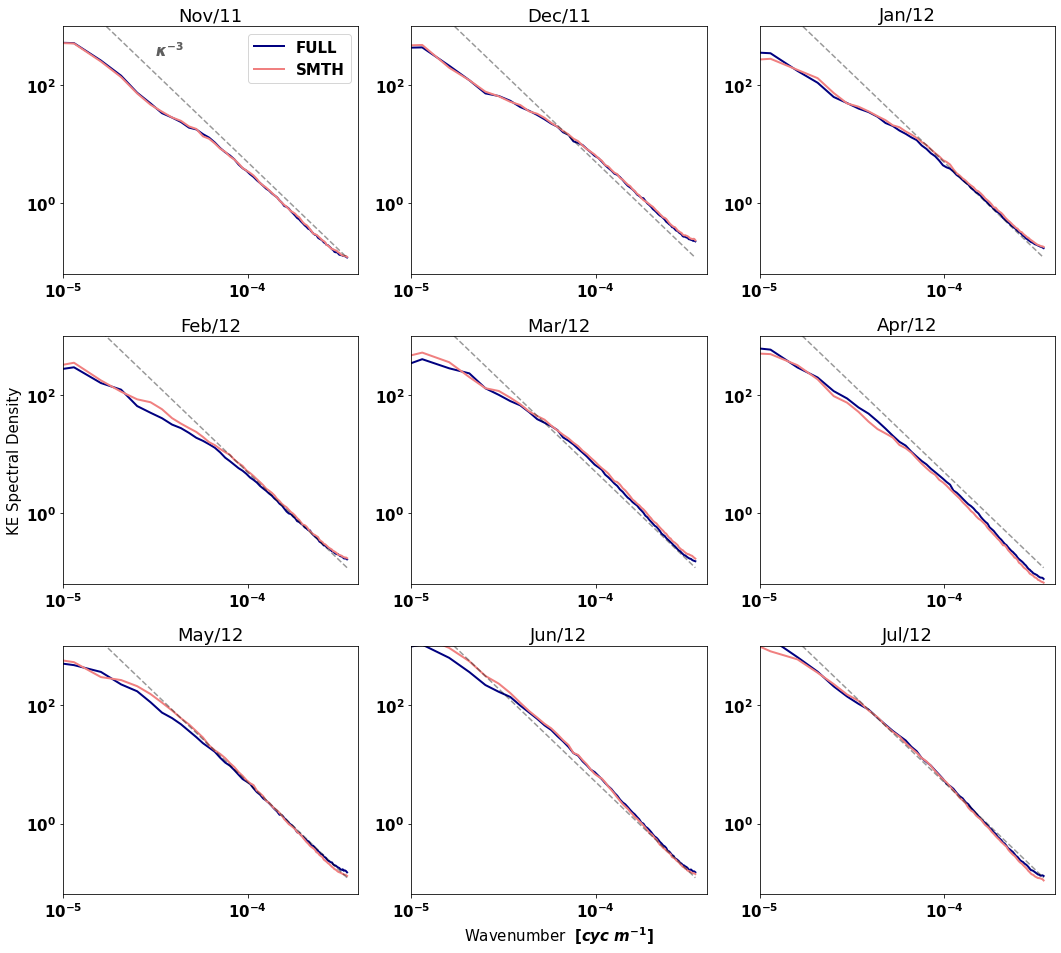

In [108]:
fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(Ekef[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='navy')
    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(Eket[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='lightcoral')
    axs[ipp].plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
    axs[0].text(-4.5,2.5,r'$\kappa^{-3}$',alpha=0.1,weight='light')
    # axs[ipp].grid()
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1.2,3)


    
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_KE.png')




## Two Sections (KE)
##### Based on observing the SST evolution of the outputs, the region soup is related to high submesoscale activity, the region upwelling is related to the average location of the upwelling front

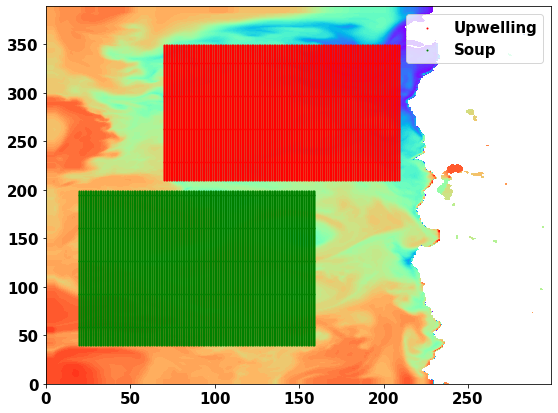

In [109]:
xx=np.arange(varf.SST[0,0,:].shape[0])
yy=np.arange(varf.SST[0,:,0].shape[0])


xm1=np.arange(70,210)
ym1=np.arange(210,350)

xm2=np.arange(20,160)
ym2=np.arange(40,200)

xx1,yy1=np.meshgrid(xx,yy)

plt.figure(figsize=(8,6))
plt.contourf(xx,yy,varf.SST[0,:,:],levels=np.linspace(283,290,65),cmap='rainbow')
plt.scatter(xx1[ym1,:][:,xm1],yy1[ym1,:][:,xm1],s=1,c='r',label='Upwelling')
plt.scatter(xx1[ym2,:][:,xm2],yy1[ym2,:][:,xm2],s=1,c='g',label='Soup')


plt.legend()
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/map_2regions.png')



In [110]:
'Upwelling Region'
usf1=varf.UOCE[:,ym1,xm1]
vsf1=varf.VOCE[:,ym1,xm1]

ust1=vart.UOCE[:,ym1,xm1]
vst1=vart.VOCE[:,ym1,xm1]

'Soup Region'
usf2=varf.UOCE[:,ym2,xm2]
vsf2=varf.VOCE[:,ym2,xm2]

ust2=vart.UOCE[:,ym2,xm2]
vst2=vart.VOCE[:,ym2,xm2]



In [111]:
exspec1=spec.TWODimensional_spec(usf1[0,:,:],dxx,dyy)
# isospec1=spec.calc_ispec(exspec1.k1,exspec1.k2,exspec1.spec)

sEkef1=np.zeros([usf1.shape[0],exspec1.ki.shape[0]])*np.nan;

sEket1=np.zeros([ust1.shape[0],exspec1.ki.shape[0]])*np.nan;


for ixx in range(usf1.shape[0]):
    uspf=spec.TWODimensional_spec(usf1[ixx,:,:],dxx,dyy)
    vspf=spec.TWODimensional_spec(vsf1[ixx,:,:],dxx,dyy)
    uspt=spec.TWODimensional_spec(ust1[ixx,:,:],dxx,dyy)
    vspt=spec.TWODimensional_spec(vst1[ixx,:,:],dxx,dyy)



    sEkef1[ixx,:]=(uspf.ispec+vspf.ispec)/2
    sEket1[ixx,:]=(uspt.ispec+vspt.ispec)/2


    
exspec2=spec.TWODimensional_spec(usf2[0,:,:],dxx,dyy)
# isospec2=spec.calc_ispec(exspec2.k1,exspec2.k2,exspec2.spec)

sEkef2=np.zeros([usf2.shape[0],exspec2.ki.shape[0]])*np.nan;

sEket2=np.zeros([ust2.shape[0],exspec2.ki.shape[0]])*np.nan;


for ixx in range(usf2.shape[0]):
    uspf=spec.TWODimensional_spec(usf2[ixx,:,:],dxx,dyy)
    vspf=spec.TWODimensional_spec(vsf2[ixx,:,:],dxx,dyy)
    uspt=spec.TWODimensional_spec(ust2[ixx,:,:],dxx,dyy)
    vspt=spec.TWODimensional_spec(vst2[ixx,:,:],dxx,dyy)


    sEkef2[ixx,:]=(uspf.ispec+vspf.ispec)/2
    sEket2[ixx,:]=(uspt.ispec+vspt.ispec)/2


### Two Sections - Average spectra (KE)
##### Total averages of the spectra for the two different regions

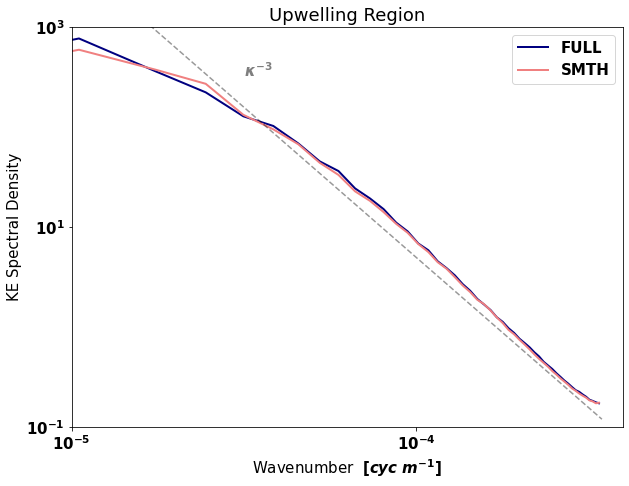

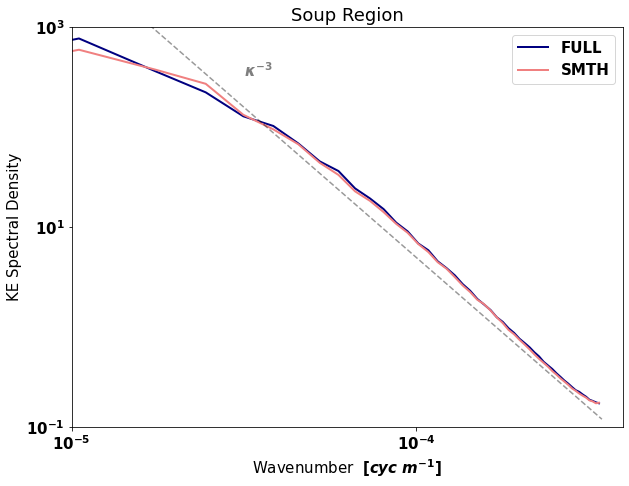

In [114]:



plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(sEkef1,axis=0)),label='FULL',linewidth=2,color='navy')


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(sEket1,axis=0)),label='SMTH',linewidth=2,color='lightcoral')
# plt.plot(np.log10(iso_eket[0]),
#          np.log10((iso_eket[0]/iso_eket[1]**-2)[::-1]),color='green')

# plt.plot(np.log10(k2),np.log10(E2))

# plt.plot(np.log10(k2),np.log10(E2),'k--',label=r'$\kappa^{-2}$')
plt.plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
plt.text(-4.5,2.5,r'$\kappa^{-3}$',weight='normal',alpha=0.5)



plt.legend()

# plt.grid()
plt.title('Upwelling Region')


plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])



#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')
plt.xlim(-5,-3.4)
plt.ylim(-1,3)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Upwelling_total_avg_KE.png')



plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(sEkef1,axis=0)),label='FULL',linewidth=2,color='navy')


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(sEket1,axis=0)),label='SMTH',linewidth=2,color='lightcoral')

# plt.plot(np.log10(k2),np.log10(E2),'k--',label=r'$\kappa^{-2}$')
plt.plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
plt.text(-4.5,2.5,r'$\kappa^{-3}$',weight='normal',alpha=0.5)





plt.legend()

# plt.grid()
plt.title('Soup Region')


plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])



#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')
plt.xlim(-5,-3.4)
plt.ylim(-1,3)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Soup_total_avg_KE.png')



### Two Sections - Monthly Average (KE)
##### Monthly Decompositions of the spectra for both regions (upwelling and soup)

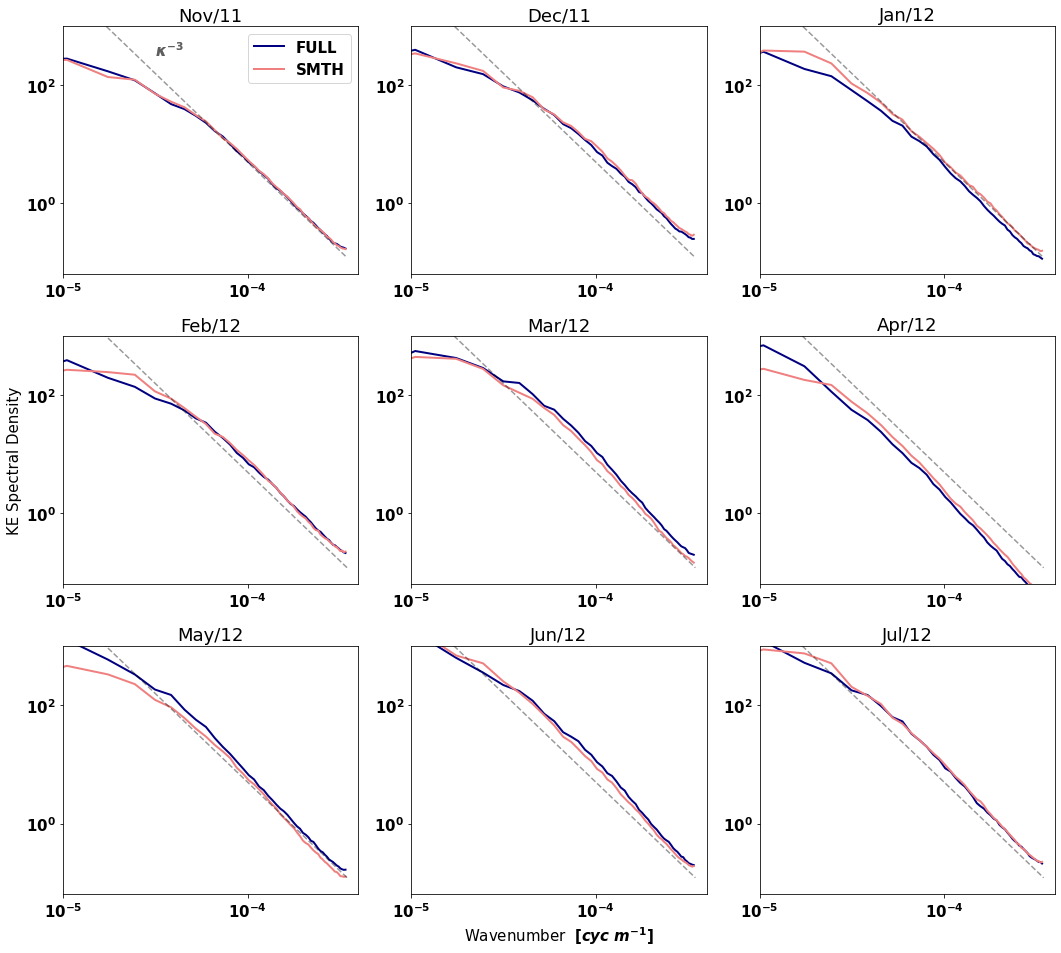

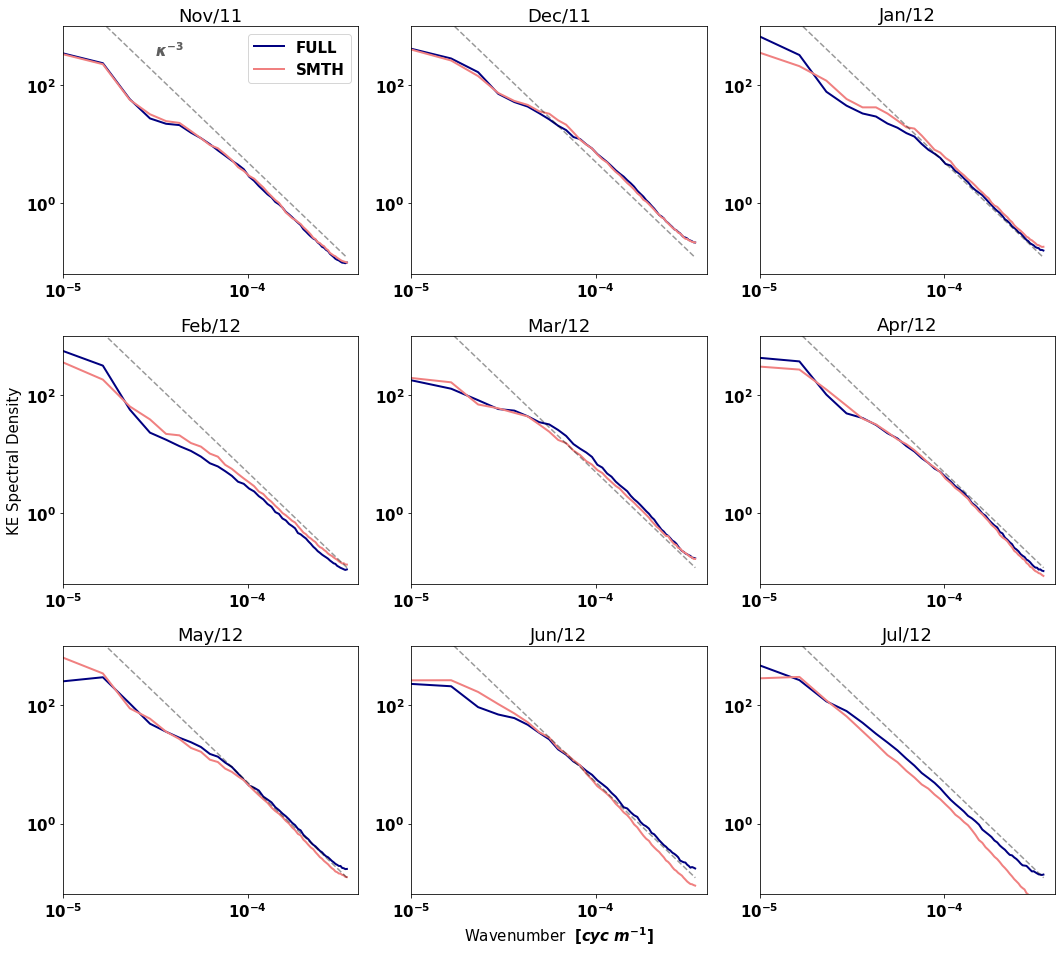

In [115]:
fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec1.ki),np.log10(np.nanmean(sEkef1[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='navy')
    axs[ipp].plot(np.log10(exspec1.ki),np.log10(np.nanmean(sEket1[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='lightcoral')
    # axs[ipp].grid()
    axs[ipp].plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
    axs[ipp].set_title('Upw Region ' + mes_str[ipp])
    axs[0].text(-4.5,2.5,r'$\kappa^{-3}$',alpha=0.1,weight='light')
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1.2,3)


    
plt.tight_layout()

plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_upw_KE.png')



fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec2.ki),np.log10(np.nanmean(sEkef2[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='navy')
    axs[ipp].plot(np.log10(exspec2.ki),np.log10(np.nanmean(sEket2[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='lightcoral')
    # axs[ipp].grid()
    axs[ipp].plot(np.log10(k3),np.log10(E3),'k--',alpha=0.4)
    axs[ipp].set_title('Soup Region ' + mes_str[ipp])
    axs[0].text(-4.5,2.5,r'$\kappa^{-3}$',alpha=0.1,weight='light')
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1.2,3)


    
plt.tight_layout()

plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_soup_KE.png')



## Wind KE Spectral Analysis (Whole Region)

#### Area of study cropped in attempt to exclude the effect of model's "sponge" and coastline

In [118]:
uwf=varf.U10[:,30:-30,30:200]
vwf=varf.V10[:,30:-30,30:200]

uwt=vart.U10[:,30:-30,30:200]
vwt=vart.V10[:,30:-30,30:200]



### Creating daily spectra array

In [117]:
exspec=spec.TWODimensional_spec(uwf[0,:,:],dxx,dyy)
# isospec=spec.calc_ispec(exspec.k1,exspec.k2,exspec.spec)

wEkef=np.zeros([uwf.shape[0],exspec.ki.shape[0]])*np.nan;

wEket=np.zeros([uwt.shape[0],exspec.ki.shape[0]])*np.nan;


for ixx in range(uwf.shape[0]):
    uwspf=spec.TWODimensional_spec(uwf[ixx,:,:],dxx,dyy)
    vwspf=spec.TWODimensional_spec(vwf[ixx,:,:],dxx,dyy)
    uwspt=spec.TWODimensional_spec(uwt[ixx,:,:],dxx,dyy)
    vwspt=spec.TWODimensional_spec(vwt[ixx,:,:],dxx,dyy)


    wEkef[ixx,:]=(uwspf.ispec+vwspf.ispec)/2
    wEket[ixx,:]=(uwspt.ispec+vwspt.ispec)/2





### Total average Wind EKE

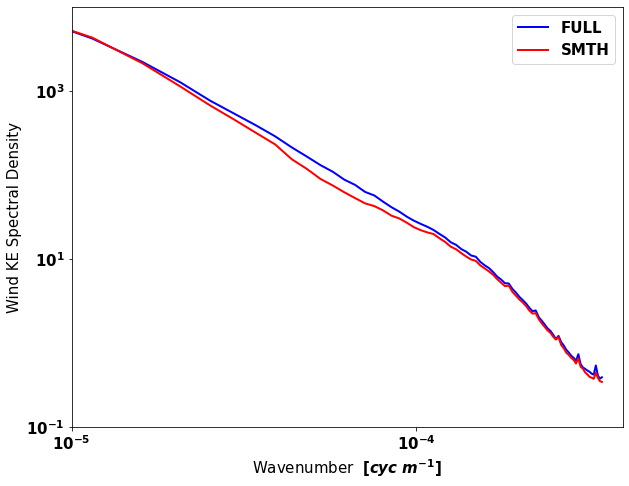

In [135]:

plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(wEkef,axis=0)),label='FULL',linewidth=2,color='blue')


plt.plot(np.log10(exspec.ki),
        np.log10(np.nanmean(wEket,axis=0)),label='SMTH',linewidth=2,color='red')
# plt.plot(np.log10(iso_eket[0]),
#          np.log10((iso_eket[0]/iso_eket[1]**-2)[::-1]),color='green')

# plt.plot(np.log10(k3*1.2),np.log10(E3*1.2),'k--')



plt.legend()

# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])


#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'Wind KE Spectral Density')
plt.xlim(-5,-3.4)
plt.ylim(-1,4)
plt.tight_layout()

plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/Total_avg_wind_KE.png')




### Seasonal Wind KE

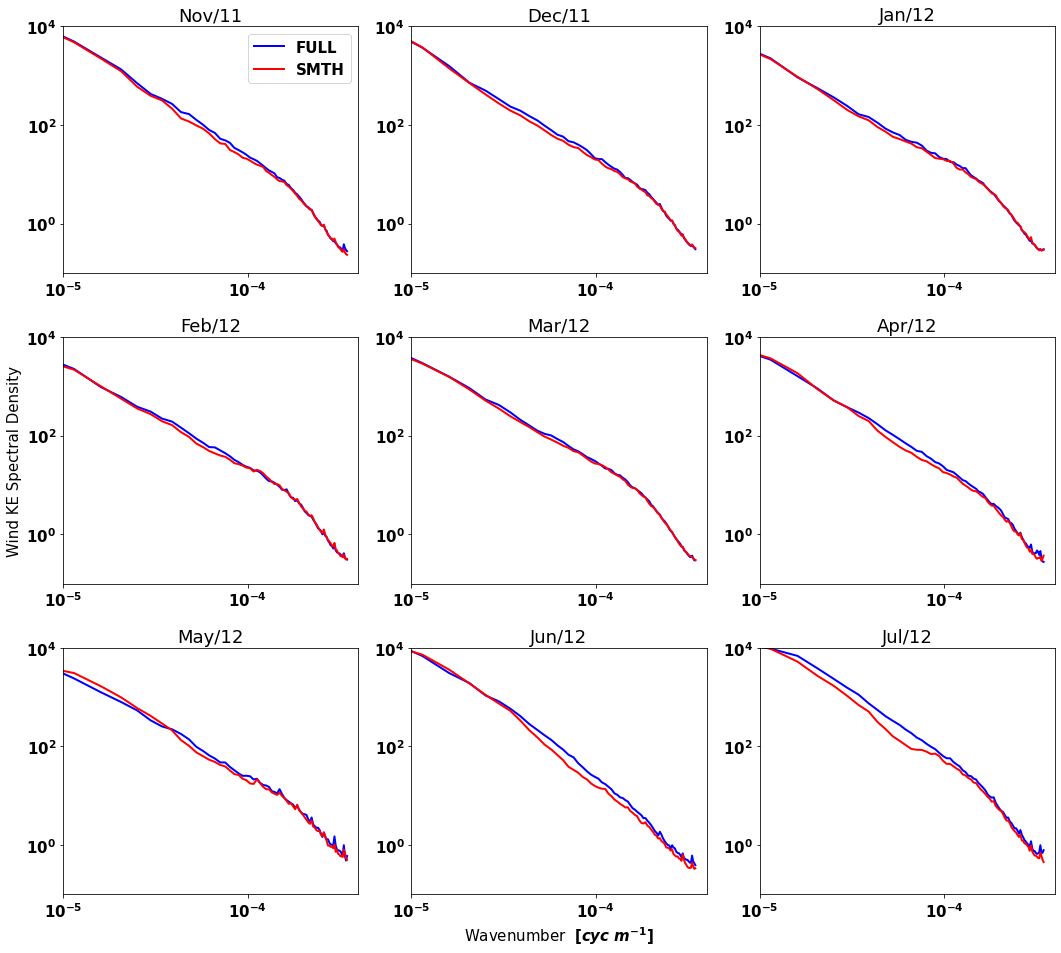

In [134]:

fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(wEkef[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='blue')
    axs[ipp].plot(np.log10(exspec.ki),np.log10(np.nanmean(wEket[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='red')
    # axs[ipp].grid()
    axs[ipp].set_title(mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2,4]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$',r'10$^{4}$'])
    axs[3].set_ylabel(r'Wind KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1,4)


    axs[0].legend()
    
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_Wind_KE.png')



## Two Sections (Wind KE)
##### Diving the spectra in the two regions: Upwelling & Soup

In [136]:
'Upwelling Region'
uwf1=varf.U10[:,ym1,xm1]
vwf1=varf.V10[:,ym1,xm1]

uwt1=vart.U10[:,ym1,xm1]
vwt1=vart.V10[:,ym1,xm1]

'Soup Region'
uwf2=varf.U10[:,ym2,xm2]
vwf2=varf.V10[:,ym2,xm2]

uwt2=vart.U10[:,ym2,xm2]
vwt2=vart.V10[:,ym2,xm2]




In [138]:
exspec1=spec.TWODimensional_spec(uwf1[0,:,:],dxx,dyy)
# isospec1=spec.calc_ispec(exspec1.k1,exspec1.k2,exspec1.spec)

swEkef1=np.zeros([uwf1.shape[0],exspec1.ki.shape[0]])*np.nan;

swEket1=np.zeros([uwt1.shape[0],exspec1.ki.shape[0]])*np.nan;


for ixx in range(uwf1.shape[0]):
    uwpf=spec.TWODimensional_spec(uwf1[ixx,:,:],dxx,dyy)
    vwpf=spec.TWODimensional_spec(vwf1[ixx,:,:],dxx,dyy)
    uwpt=spec.TWODimensional_spec(uwt1[ixx,:,:],dxx,dyy)
    vwpt=spec.TWODimensional_spec(vwt1[ixx,:,:],dxx,dyy)


    swEkef1[ixx,:]=(uwpf.ispec+vwpf.ispec)/2
    swEket1[ixx,:]=(uwpt.ispec+vwpt.ispec)/2




exspec2=spec.TWODimensional_spec(uwf2[0,:,:],dxx,dyy)
# isospec2=spec.calc_ispec(exspec2.k1,exspec2.k2,exspec2.spec)

swEkef2=np.zeros([uwf2.shape[0],exspec2.ki.shape[0]])*np.nan;

swEket2=np.zeros([uwt2.shape[0],exspec2.ki.shape[0]])*np.nan;


for ixx in range(uwf2.shape[0]):
    uwpf=spec.TWODimensional_spec(uwf2[ixx,:,:],dxx,dyy)
    vwpf=spec.TWODimensional_spec(vwf2[ixx,:,:],dxx,dyy)
    uwpt=spec.TWODimensional_spec(uwt2[ixx,:,:],dxx,dyy)
    vwpt=spec.TWODimensional_spec(vwt2[ixx,:,:],dxx,dyy)


    swEkef2[ixx,:]=(uwpf.ispec+vwpf.ispec)/2
    swEket2[ixx,:]=(uwpt.ispec+vwpt.ispec)/2


### Two Sections - Average Wind KE
##### Average of Wind KE spectra for both regions

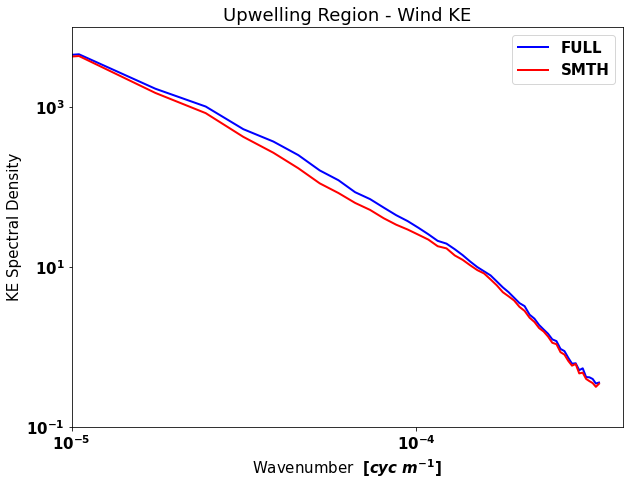

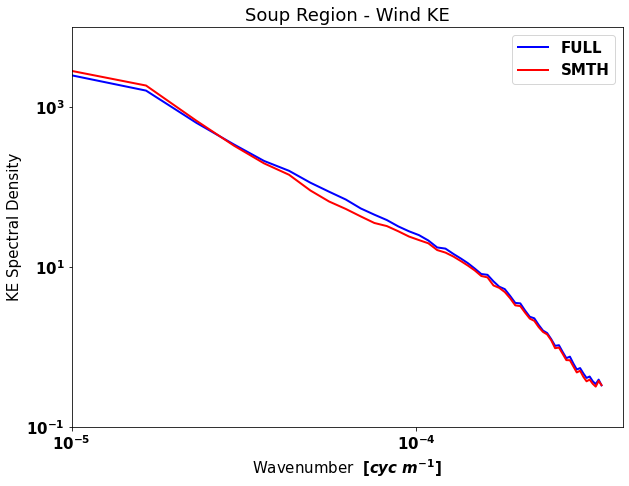

In [140]:

plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(swEkef1,axis=0)),label='FULL',linewidth=2,color='blue')


plt.plot(np.log10(exspec1.ki),
        np.log10(np.nanmean(swEket1,axis=0)),label='SMTH',linewidth=2,color='red')
# plt.plot(np.log10(iso_eket[0]),
#          np.log10((iso_eket[0]/iso_eket[1]**-2)[::-1]),color='green')

# plt.plot(np.log10(k2),np.log10(E2))



plt.legend()

# plt.grid()
plt.title('Upwelling Region - Wind KE')
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])


#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')
plt.xlim(-5,-3.4)
plt.ylim(-1,4)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/upw_total_avg_wind_KE.png')



plt.figure(figsize=(9,7))


plt.plot(np.log10(exspec2.ki),
        np.log10(np.nanmean(swEkef2,axis=0)),label='FULL',linewidth=2,color='blue')


plt.plot(np.log10(exspec2.ki),
        np.log10(np.nanmean(swEket2,axis=0)),label='SMTH',linewidth=2,color='red')
# plt.plot(np.log10(iso_eket[0]),
#          np.log10((iso_eket[0]/iso_eket[1]**-2)[::-1]),color='green')

# plt.plot(np.log10(k2),np.log10(E2))



plt.legend()

# plt.grid()
plt.title('Soup Region - Wind KE')
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])
plt.xlim(-5,-3.4)
plt.ylim(-1,4)

#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/soup_total_avg_wind_KE.png')



### Two Sections - Monthly (Wind KE)
##### Monthly decomposition

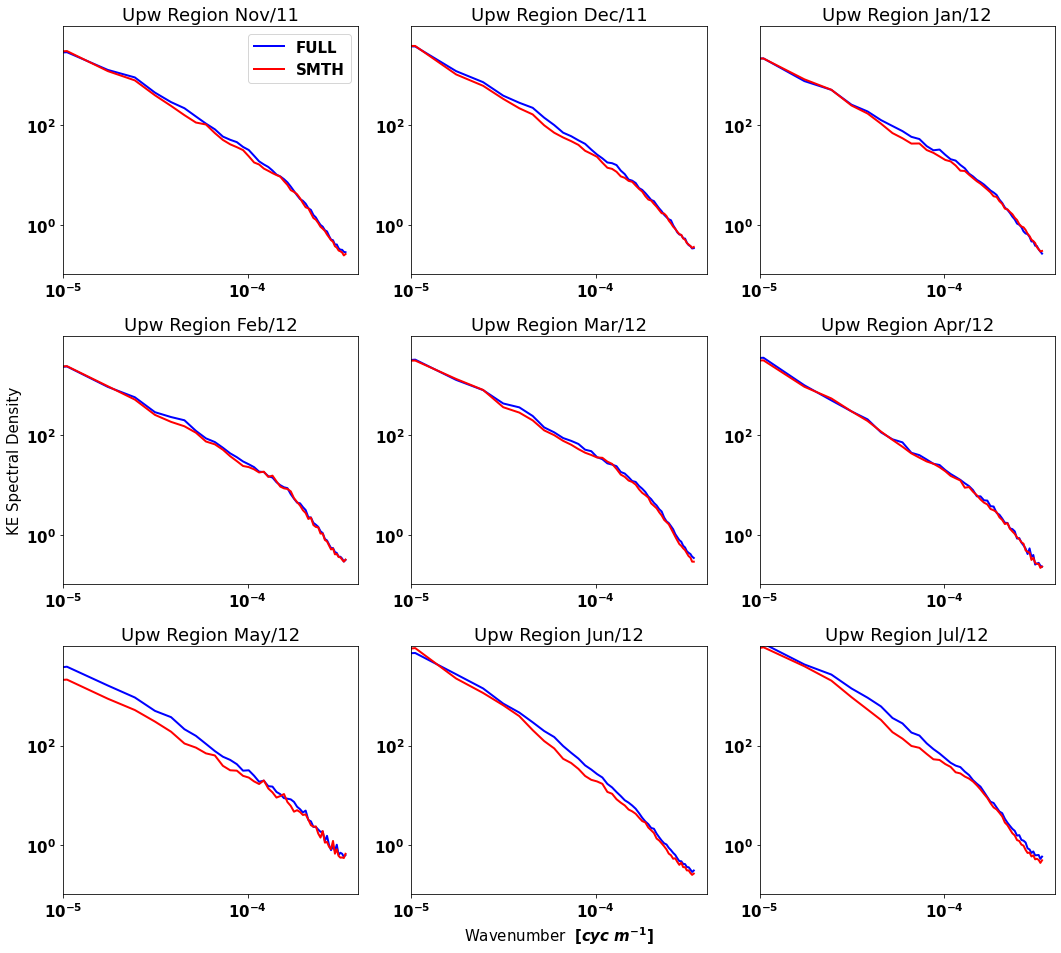

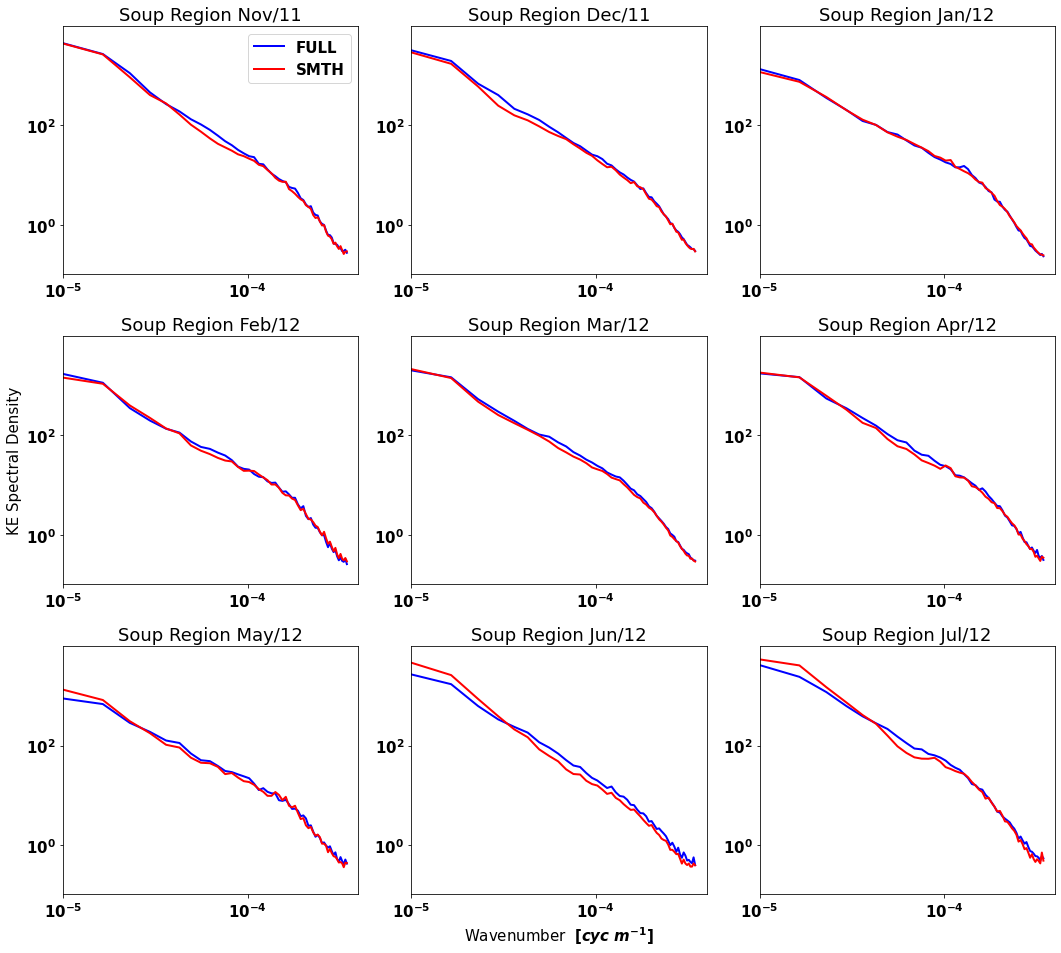

In [141]:
fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec1.ki),np.log10(np.nanmean(swEkef1[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='blue')
    axs[ipp].plot(np.log10(exspec1.ki),np.log10(np.nanmean(swEket1[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='red')
    # axs[ipp].grid()
    axs[ipp].set_title('Upw Region ' + mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1,4)
    
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_upw_wind_KE.png')



fig, axs = plt.subplots(3,3, figsize=(15, 13.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()

for ipp in range(len(mes)):

    axs[ipp].plot(np.log10(exspec2.ki),np.log10(np.nanmean(swEkef2[mon_ind==mes[ipp],:],axis=0)),label='FULL',linewidth=2,color='blue')
    axs[ipp].plot(np.log10(exspec2.ki),np.log10(np.nanmean(swEket2[mon_ind==mes[ipp],:],axis=0)),label='SMTH',linewidth=2,color='red')
    # axs[ipp].grid()
    axs[ipp].set_title('Soup Region ' + mes_str[ipp])
    axs[ipp].set_xticks(np.array([-5,-4]))
    axs[ipp].set_xticklabels([r'10$^{-5}$',r'10$^{-4}$'])
    axs[ipp].set_yticks(np.array([-2,0,2]))
    axs[ipp].set_yticklabels([r'10$^{-2}$',r'10$^{0}$',r'10$^{2}$'])
    axs[3].set_ylabel(r'KE Spectral Density')
    axs[7].set_xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
    axs[0].legend()
    axs[ipp].set_xlim(-5,-3.4)
    axs[ipp].set_ylim(-1,4)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures/monthly_soup_wind_KE.png')



### Teste SST

In [28]:
dyy=np.diff(Tf.nav_lat).mean()*111
dxx=np.diff(Tf.nav_lon).mean()*111

In [29]:
Tf=varf.SST[:,30:-30,30:200] 
Tt=vart.SST[:,30:-30,30:200]

# dxx=0.013*111
# dyy=0.013*111

pTf=spec.TWODimensional_spec(Tf[10,:,:],dxx,dyy)
pTt=spec.TWODimensional_spec(Tt[10,:,:],dxx,dyy)


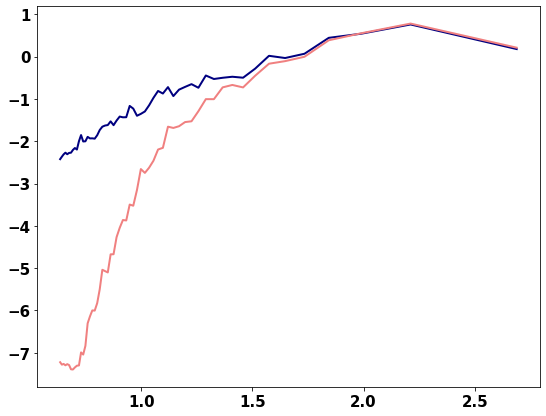

In [36]:
plt.figure(figsize=(9,7))

plt.plot(np.log10(1/pTf.ki),np.log10(pTf.ispec),label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(1/pTt.ki),np.log10(pTt.ispec),label='SMTH',linewidth=2,color='lightcoral')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


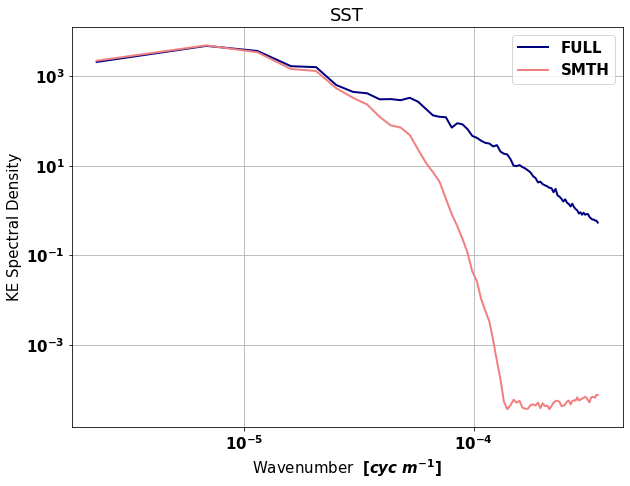

In [7]:


plt.figure(figsize=(9,7))

plt.plot(np.log10(pTf.ki),np.log10(pTf.ispec),label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(pTt.ki),np.log10(pTt.ispec),label='SMTH',linewidth=2,color='lightcoral')



plt.legend()

plt.grid()
plt.title('SST')
# plt.xlim(-5,-3)
plt.xticks(np.array([-5,-4]),[r'10$^{-5}$',r'10$^{-4}$'])
plt.yticks(np.array([-3,-1,1,3]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$'])


#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'Wavenumber  $[cyc$ $m^{-1}]$')
plt.ylabel(r'KE Spectral Density')

plt.tight_layout()

In [94]:
# import numpy as np
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,2))
# values = np.array([19,10,15,2,1,13,17])

# n=plt.hist(values, 10, histtype = 'bar', facecolor = 'blue')
# plt.ylabel("Values")
# plt.xlabel("Bin Number")
# plt.title("Histogram")
# plt.xticks(np.arange(0,20))
# # plt.axis([0,2200000,0,11])
# plt.show()